# 단순선형 회귀분석
### 1) 자동차 배기량과 연비 회귀분석

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [15]:
# X는 자동차 배기량, y는 연비
X = np.array([1, 1.4, 1.6, 2, 2.2, 2.4, 3, 3.3, 3.6])
y = np.array([15, 13, 13, 12, 11, 10.5, 10, 9, 8])

# 상수 추가 y절편 추가
X_with_const = sm.add_constant(X)

# 모델 훈련
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.97e-06
Time:                        15:31:30   Log-Likelihood:                -3.9965
No. Observations:                   9   AIC:                             11.99
Df Residuals:                       7   BIC:                             12.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8291      0.414     40.626      0.0

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


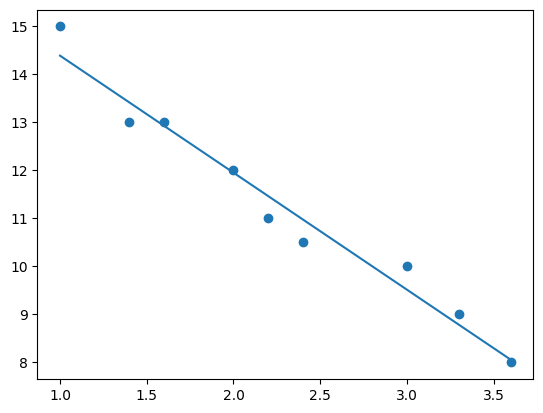

In [16]:
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()

* R-squared : 09.67로 약 96% 설명한다
* p-value : 1.97e-06으로 매우 작기 때문에(0.001이하)통계적으로 유의미하다
* x의 회귀계수는 -2.4371(x1 - coef)이고
* 상수항(y절편)은 16.8291(const - coef)이다.
* 따라서 추정되는 회귀식은 y(연비) = -2.4371 * X1 + 16.8291
* y(연비)가 기울기임

## 단순성형회귀분석에 대한 ANOVA 분산분석

In [18]:
from statsmodels.formula.api import ols

X = np.array([1, 1.4, 1.6, 2, 2.2, 2.4, 3, 3.3, 3.6])
y = np.array([15, 13, 13, 12, 11, 10.5, 10, 9, 8])

data = pd.DataFrame(dict(X=X, y=y))
model = ols('y ~ X', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq   df           F    PR(>F)
X         37.274792  1.0  203.725066  0.000002
Residual   1.280763  7.0         NaN       NaN


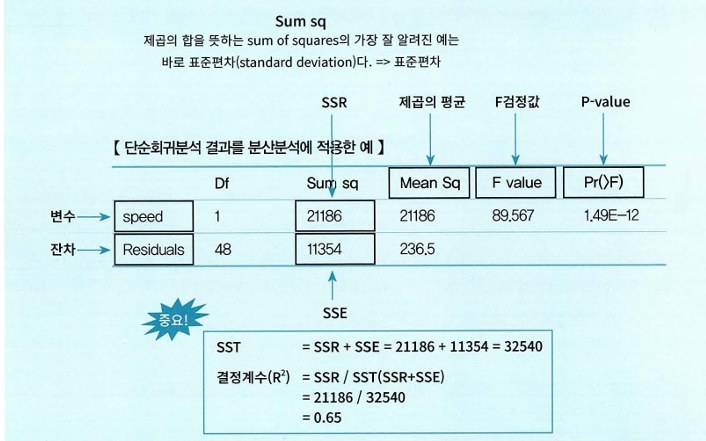

In [19]:
37.274792 / (37.274792 + 1.280763)

0.9667813626337372

## QQ-plot 그리기

In [21]:
# !pip install plotnine

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   ---------------------------------------- 1.3/1.3 MB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.4 kB ? eta -:--:--
   ---------------------------------------- 127.4/127.4 kB ? eta 0:00:00


In [22]:
import scipy.stats as stats
from plotnine import ggplot, aes, stat_qq, stat_qq_line, labs

In [23]:
X

array([1. , 1.4, 1.6, 2. , 2.2, 2.4, 3. , 3.3, 3.6])

In [24]:
y

array([15. , 13. , 13. , 12. , 11. , 10.5, 10. ,  9. ,  8. ])

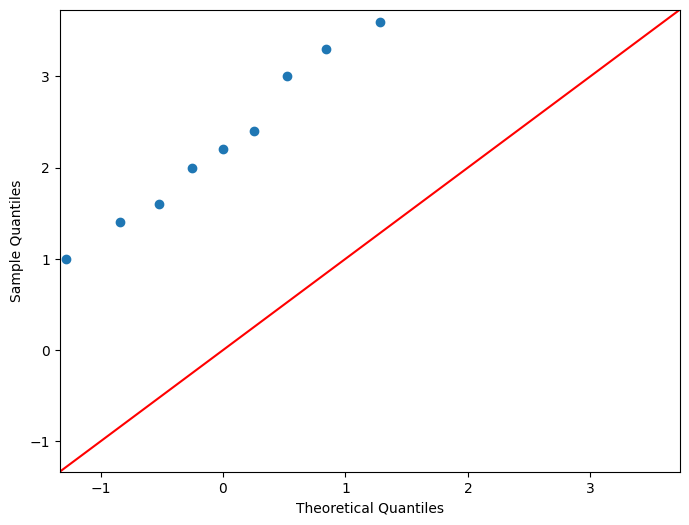

In [25]:
# QQplot 생성
plt.figure(figsize=(8,6))
sm.qqplot(X, line='45', ax=plt.gca(), label='x')
plt.show()

## 다중회귀분석

In [27]:
# 데이터
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35]) # 땅 면적이 얼마나 되는지
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 독립 변수와 종속 변수 설정
X = np.column_stack((yard, area, park, dist))
y = price

# 상수 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.07
Date:                Tue, 27 Aug 2024   Prob (F-statistic):            0.00627
Time:                        16:43:38   Log-Likelihood:                -75.420
No. Observations:                  10   AIC:                             160.8
Df Residuals:                       5   BIC:                             162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3045.6891   4084.218      0.746      0.4

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10


In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()